<a href="https://colab.research.google.com/github/eaa3ug/clustering_assignment/blob/main/Milestone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 3
## Setting Up and Uploading Data

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./adult24.csv')
print(df.shape, '\n')
df.head()

(32629, 630) 



,RATCAT_A,INCTCFLG_A,IMPINCFLG_A,PPSU,PSTRAT,WLKLEISTC_A,WLKTRANTC_A,HISPALLP_A,RACEALLP_A,ANYDIFF_A,...,LSATIS4_A,PHSTAT_A,HHSTAT_A,INTV_MON,RECTYPE,IMPNUM_A,AVGNUMCIG_A,WTFA_A,HHX,POVRATTC_A
0,9,0,2,2,122,NaN,NaN,2,1,2,...,1,1,1,1,10,1,30,5780.565,H067658,2.82
1,8,0,0,2,122,20.0,NaN,2,1,2,...,2,2,1,1,10,1,20,3994.244,H076577,2.01
2,7,0,0,2,122,30.0,NaN,2,1,1,...,1,2,1,1,10,1,20,6636.755,H019335,1.90
3,12,0,0,2,122,10.0,NaN,2,1,1,...,2,3,1,1,10,1,01,13767.420,H012701,4.48
4,14,0,0,1,115,NaN,NaN,3,2,1,...,2,3,1,1,10,1,NaN,18880.030,H049678,6.37


## Cleaning Data

In [3]:
#Keeping Only Columns of Interest
cols = ['GESDIB_A', 'PREDIB_A', 'DIBEV_A', 'DIBTYPE_A',
        'DIBAGETC_A', 'FDSRUNOUT_A', 'FDSLAST_A',
        'FDSHUNGRY_A','FSNAP12M_A', 'FSNAP30D_A', 'SEX_A', 'REGION', 'RACEALLP_A',
        'RATCAT_A', 'EDUCP_A', 'PHSTAT_A', 'WLKLEIS_A', 'BMICAT_A', 'HYPEV_A','CHLEV_A','AGEP_A']
df = df[cols]
print(df.shape, '\n')
df.head()

(32629, 21) 



,GESDIB_A,PREDIB_A,DIBEV_A,DIBTYPE_A,DIBAGETC_A,FDSRUNOUT_A,FDSLAST_A,FDSHUNGRY_A,FSNAP12M_A,FSNAP30D_A,...,REGION,RACEALLP_A,RATCAT_A,EDUCP_A,PHSTAT_A,WLKLEIS_A,BMICAT_A,HYPEV_A,CHLEV_A,AGEP_A
0,NaN,2,2,NaN,NaN,3,3,NaN,2,NaN,...,3,1,9,5,1,2.0,3,2,2,49
1,NaN,2,2,NaN,NaN,3,3,NaN,2,NaN,...,3,1,8,5,2,1.0,3,1,2,53
2,NaN,2,2,NaN,NaN,3,3,NaN,2,NaN,...,3,1,7,5,2,1.0,4,1,2,82
3,NaN,2,2,NaN,NaN,3,2,2.0,2,NaN,...,3,1,12,4,3,1.0,3,2,2,42
4,2.0,2,2,NaN,NaN,3,3,NaN,2,NaN,...,3,2,14,9,3,2.0,3,2,2,38


In [4]:
#Creating Food Insecurity Variable
df[["FSNAP12M_A", "FSNAP30D_A", "FDSRUNOUT_A","FDSLAST_A", "FDSHUNGRY_A"]] = df[["FSNAP12M_A", "FSNAP30D_A", "FDSRUNOUT_A", "FDSLAST_A", "FDSHUNGRY_A"]].replace([7, 8, 9], np.nan)

df["FOOD_INS"] = np.where((df[["FSNAP12M_A", "FSNAP30D_A", "FDSRUNOUT_A", "FDSLAST_A", "FDSHUNGRY_A"]] == 1).any(axis=1), 1,
    np.where((df[["FDSRUNOUT_A","FDSLAST_A"]] == 2).any(axis=1), 1,
             np.where((df[["FSNAP12M_A", "FSNAP30D_A", "FDSHUNGRY_A"]] == 2).any(axis=1),0,
                      np.where((df[["FSNAP12M_A", "FSNAP30D_A"]] == 3).any(axis=1),0, np.nan))))
df = df.drop(columns=["FSNAP12M_A", "FSNAP30D_A", "FDSRUNOUT_A","FDSLAST_A", "FDSHUNGRY_A"])
df.head()



,GESDIB_A,PREDIB_A,DIBEV_A,DIBTYPE_A,DIBAGETC_A,SEX_A,REGION,RACEALLP_A,RATCAT_A,EDUCP_A,PHSTAT_A,WLKLEIS_A,BMICAT_A,HYPEV_A,CHLEV_A,AGEP_A,FOOD_INS
0,NaN,2,2,NaN,NaN,1,3,1,9,5,1,2.0,3,2,2,49,0.0
1,NaN,2,2,NaN,NaN,1,3,1,8,5,2,1.0,3,1,2,53,0.0
2,NaN,2,2,NaN,NaN,1,3,1,7,5,2,1.0,4,1,2,82,0.0
3,NaN,2,2,NaN,NaN,1,3,1,12,4,3,1.0,3,2,2,42,1.0
4,2.0,2,2,NaN,NaN,2,3,2,14,9,3,2.0,3,2,2,38,0.0


In [5]:
#Creating one variable for diabetes
df[["PREDIB_A", "GESDIB_A", "DIBEV_A"]] = df[["PREDIB_A", "GESDIB_A", "DIBEV_A"]].replace([7, 8, 9], np.nan)

df["DIAB_ANY"] = np.where((df[["PREDIB_A", "GESDIB_A", "DIBEV_A"]] == 1).any(axis=1), 1,
    np.where((df[["PREDIB_A", "GESDIB_A", "DIBEV_A"]] == 2).any(axis=1), 0, np.nan))
df = df.drop(columns=["PREDIB_A", "GESDIB_A", "DIBEV_A"])

df.head()

,DIBTYPE_A,DIBAGETC_A,SEX_A,REGION,RACEALLP_A,RATCAT_A,EDUCP_A,PHSTAT_A,WLKLEIS_A,BMICAT_A,HYPEV_A,CHLEV_A,AGEP_A,FOOD_INS,DIAB_ANY
0,NaN,NaN,1,3,1,9,5,1,2.0,3,2,2,49,0.0,0.0
1,NaN,NaN,1,3,1,8,5,2,1.0,3,1,2,53,0.0,0.0
2,NaN,NaN,1,3,1,7,5,2,1.0,4,1,2,82,0.0,0.0
3,NaN,NaN,1,3,1,12,4,3,1.0,3,2,2,42,1.0,0.0
4,NaN,NaN,2,3,2,14,9,3,2.0,3,2,2,38,0.0,0.0


In [6]:
#Final code to run at end of data manipulation

df.to_csv('diabetes_clean.csv', index=False)

## Visualizing the data


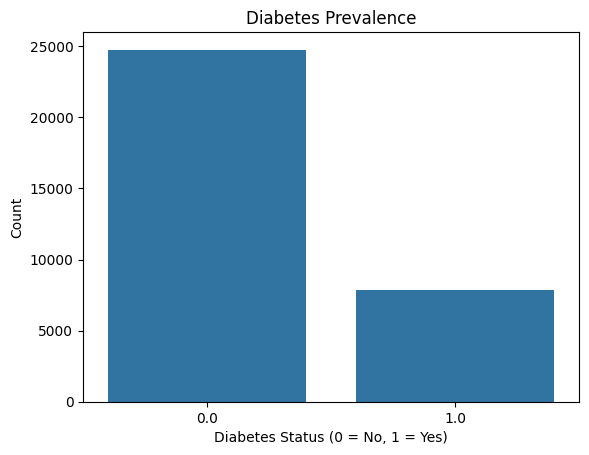

In [7]:
sns.countplot(data=df, x="DIAB_ANY")
plt.title("Diabetes Prevalence")
plt.xlabel("Diabetes Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [8]:
counts = df['DIAB_ANY'].value_counts().sort_index()
percentages = counts / counts.sum() * 100

print(f"No Diabetes (0): {percentages[0]:.2f}%")
print(f"Diabetes (1): {percentages[1]:.2f}%")

No Diabetes (0): 75.92%
Diabetes (1): 24.08%


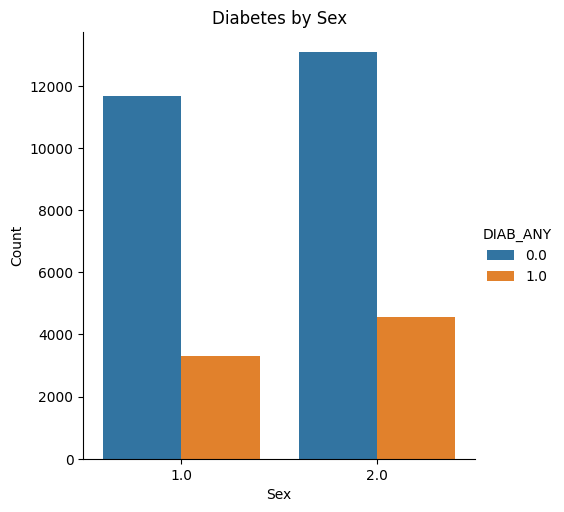

In [9]:
df[["SEX_A"]] = df[["SEX_A"]].replace([7, 8, 9], np.nan)

sns.catplot(
    data=df,
    x="SEX_A",
    hue="DIAB_ANY",
    kind="count"
)
plt.title("Diabetes by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [10]:
df_sex_diab = df[["SEX_A", "DIAB_ANY"]].dropna()

sex_diabetes_percent = (df_sex_diab.groupby("SEX_A")["DIAB_ANY"].mean() * 100)

print("Percent with Diabetes by Sex:")
print(f"Male (1): {sex_diabetes_percent[1]:.2f}%")
print(f"Female (2): {sex_diabetes_percent[2]:.2f}%")

Percent with Diabetes by Sex:
Male (1): 22.06%
Female (2): 25.80%


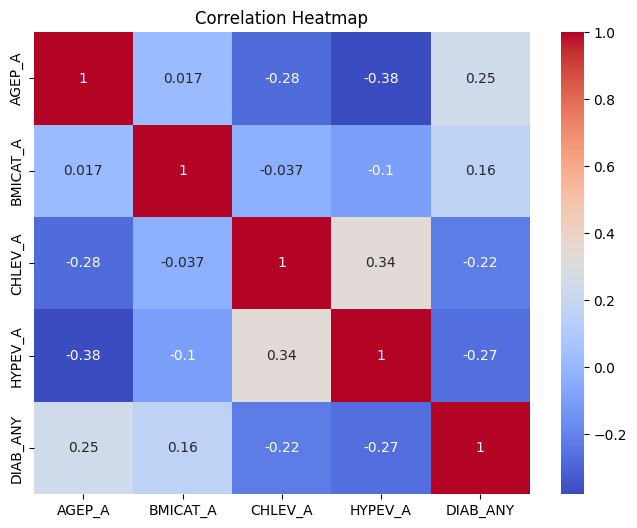

In [11]:
plt.figure(figsize=(8,6))
corr = df[['AGEP_A','BMICAT_A','CHLEV_A','HYPEV_A','DIAB_ANY']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Building Model
### Setting up Tree

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

df = df.dropna(subset=['DIAB_ANY'])
N = df.shape[0]
df = df.sample(frac=1, random_state=100).reset_index(drop=True)
train_size=int(.8*N)
df_train = df.iloc[:train_size, :].copy()
df_test = df.iloc[train_size:, :].copy()

y_train = df_train['DIAB_ANY']
X_train = df_train.drop('DIAB_ANY',axis=1)

y_test = df_test['DIAB_ANY']
X_test = df_test.drop('DIAB_ANY',axis=1)

drop_variables = ['DIBTYPE_A', 'DIBAGETC_A']
X_train = X_train.drop(drop_variables, axis=1)
X_test = X_test.drop(drop_variables, axis=1)

min_samp = max(1, int(0.01 * len(df_train)))

def quick_tree(df,depth=15):
    df_t = df_train.sample(n=df.shape[0],replace=True)
    y_train = df_t['DIAB_ANY']
    X_train = df_t.drop('DIAB_ANY',axis=1)

    drop_variables = ['DIBTYPE_A', 'DIBAGETC_A']
    X_train = X_train.drop(drop_variables, axis=1)

    cart = tree.DecisionTreeClassifier(max_depth=depth, min_samples_leaf=min_samp)
    cart = cart.fit(X_train, y_train)

    plt.figure(figsize=(10,10))
    tree.plot_tree(cart,feature_names=X_train.columns.to_list(),filled=True)
    plt.show()

    y_hat = cart.predict(X_test)

    tab = pd.crosstab(y_test, y_hat, rownames=['Actual'], colnames=['Predicted'])
    tab = tab.reindex([0, 1])
    print('Confusion Matrix: ')
    print(tab)

    TP = tab.iloc[0,0]
    TN = tab.iloc[1,1]
    FP = tab.iloc[1,0]
    FN = tab.iloc[0,1]

    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)

    print('True Positive Rate: ', round(TPR, 3))
    print('True Negative Rate: ', round(TNR, 3))

    accuracy = accuracy_score(y_test, y_hat)
    print('Accuracy: ', round(accuracy, 3))

    return y_hat, tab, accuracy, TPR, TNR

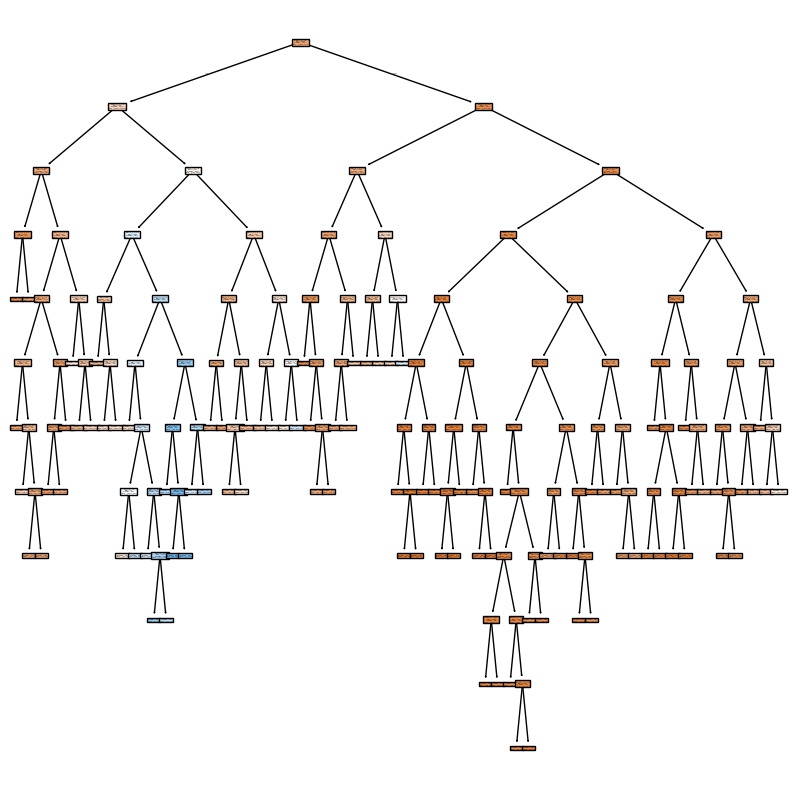

Confusion Matrix: 
Predicted   0.0  1.0
Actual              
0          4670  277
1          1135  440
True Positive Rate:  0.944
True Negative Rate:  0.279
Accuracy:  0.784


In [13]:
y_hat_1 = quick_tree(df)

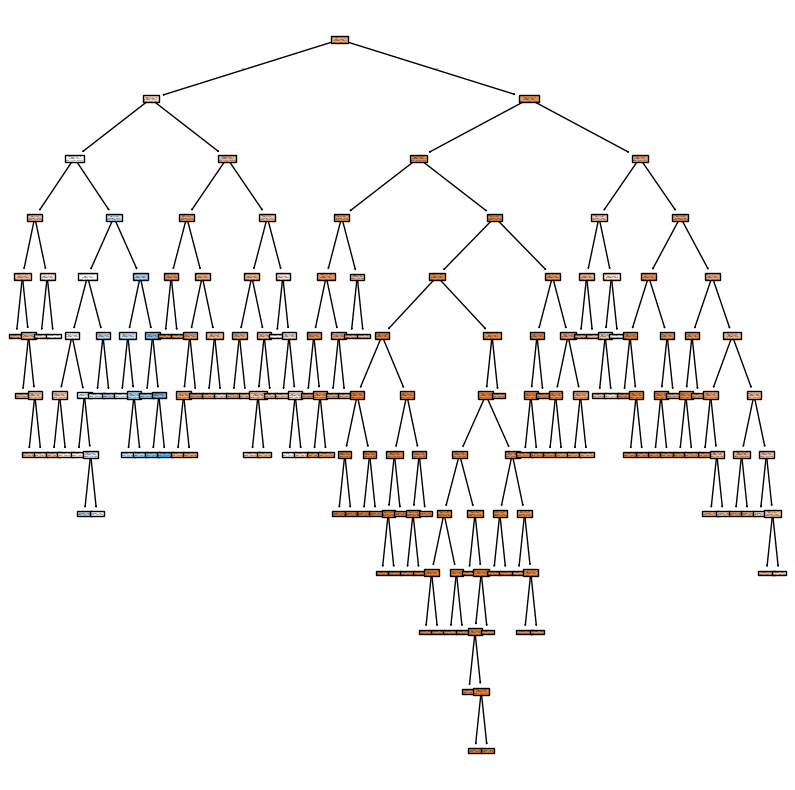

Confusion Matrix: 
Predicted   0.0  1.0
Actual              
0          4632  315
1          1105  470
True Positive Rate:  0.936
True Negative Rate:  0.298
Accuracy:  0.782


In [14]:
y_hat_2 = quick_tree(df)

### Testing Max Depth Values

In [15]:
y_test = df_test['DIAB_ANY']
X_test = df_test.drop('DIAB_ANY',axis=1)
X_test = X_test.drop(['DIBTYPE_A', 'DIBAGETC_A'], axis=1)

y_train = df_train['DIAB_ANY']
X_train = df_train.drop('DIAB_ANY',axis=1)
X_train = X_train.drop(['DIBTYPE_A', 'DIBAGETC_A'], axis=1)

depth_values = [5, 10, 15, 20]
results = []

for depth in depth_values:
    min_samp = max(1, int(0.01 * len(df_train)))

    cart = tree.DecisionTreeClassifier(max_depth=depth,
                                      min_samples_leaf=min_samp,
                                      random_state=0)
    cart = cart.fit(X_train, y_train)
    y_pred = cart.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    results.append({'max depth':depth,
                    'Accuracy':accuracy})

dfresults = pd.DataFrame(results)
print(dfresults)

   max depth  Accuracy
0          5  0.784729
1         10  0.784729
2         15  0.784729
3         20  0.784729


### Bootstrap Aggregation

In [22]:
T = 1000
m_depth =10

N_test = X_test.shape[0]
acc = np.zeros(T)
y_test_hat = np.zeros((T, N_test))

In [23]:
for s in range(T):
  df_s = df_train.sample(frac=1, replace=True)
  X_s = df_s.drop(columns='DIAB_ANY', axis=1)
  y_s = (df_s['DIAB_ANY'])

  X_s = X_s.drop(drop_variables, axis=1)

  cart = tree.DecisionTreeClassifier(max_depth=m_depth, min_samples_leaf=min_samp)
  cart = cart.fit(X_s, y_s)

  y_hat = cart.predict(X_test)
  acc[s] = accuracy_score(y_test, y_hat)
  y_test_hat[s,:] = y_hat

y_ensemble = np.mean(y_test_hat, axis=0).astype(int)
accuracy_ensemble = accuracy_score(y_test, y_ensemble)
print('Accuracy: ', round(accuracy_ensemble, 3))

Accuracy:  0.768


0.7885617908616989
2.5% and 97.5% accuracy quantiles: [0.77828887 0.78702852]


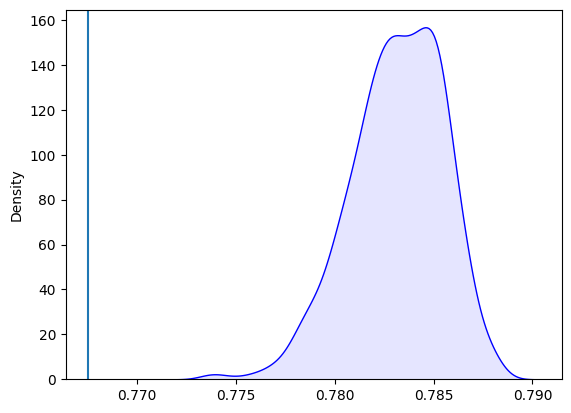

In [24]:
ax = sns.kdeplot(x = acc, fill = True, color = "blue", alpha = 0.1)
ax.axvline(x = accuracy_ensemble)

print(np.quantile(acc,1))
print("2.5% and 97.5% accuracy quantiles:",
      np.quantile(acc, [0.025, 0.975]))

## Random Forests

In [25]:
y_train.head()

,DIAB_ANY
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


Accuracy:  0.787


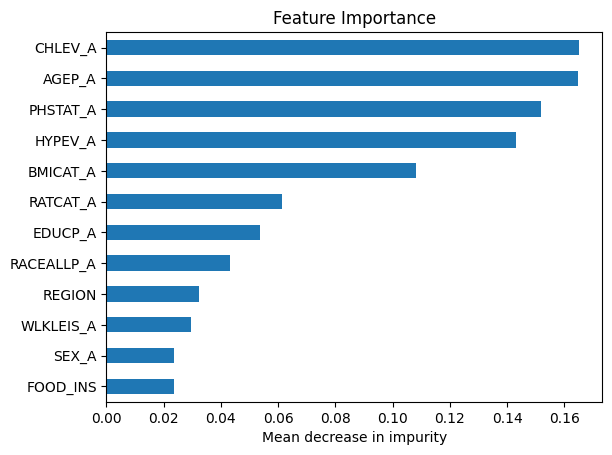

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)
rf.fit(X_train, y_train)

y_hat_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_hat_rf)
print('Accuracy: ', round(rf_accuracy, 3))

feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns )
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Mean decrease in impurity')
plt.show()